In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
p = 0.8
total_population_size = 1000
number_of_yes = int(total_population_size * p)
sample_size = int(0.7 * total_population_size)

# Hypergeometric case

In [3]:
rv = scipy.stats.hypergeom(total_population_size, number_of_yes, sample_size)

x = np.arange(0, sample_size+1)
xx = x / (sample_size + 1) * 100
y = rv.pmf(x)
z = rv.cdf(x)

The normal approximation is

$$ P(X\leq k) \approx \Phi\Big( \frac{k-np}{\sqrt{np(1-p)}} \Big). $$

In [4]:
std_normal = scipy.stats.norm(loc=0, scale=1)
normalisation = np.sqrt(sample_size * p * (1-p))
na = std_normal.cdf((x - sample_size*p)/normalisation)

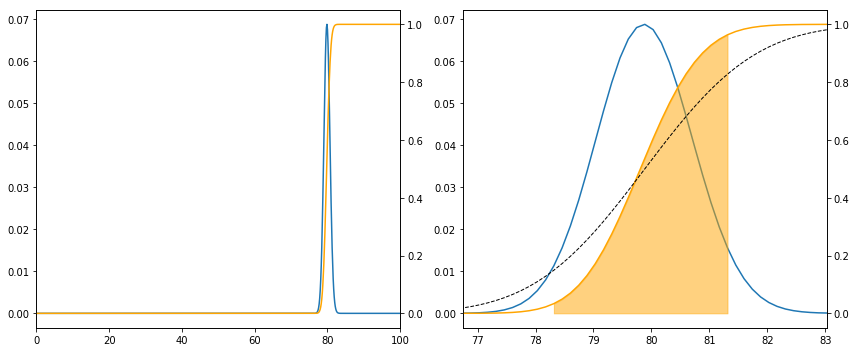

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))

ax = axes[0]
ax.plot(xx,y)
ax.set(xlim=[0,100])
ax = ax.twinx()
ax.plot(xx,z, color="orange")

ax = axes[1]
ax.plot(xx,y)
ax = ax.twinx()
ax.plot(xx,z, color="orange")
ax.plot(xx,na, color="black", linestyle="--", linewidth=1)
start = np.nonzero(z>0.025)[0][0]
end = np.nonzero(z>=1-0.025)[0][0]
#ax.plot([start,start], [0, z[start]], color="orange")
#ax.plot([end,end], [0, z[end]], color="orange")
ax.fill_between(xx[start:end], z[start:end], color="orange", alpha=0.5)
g = (end - start)/2
s = int(max(0, start-g))
e = int(min(sample_size, end+g))
ax.set(xlim=[xx[s], xx[e]])

fig.tight_layout()
None

In [6]:
fig.savefig("ss_one.png")

# Binomial case

In [7]:
rv = scipy.stats.binom(sample_size, p)

x = np.arange(0, sample_size+1)
xx = x / (sample_size + 1) * 100
y = rv.pmf(x)
z = rv.cdf(x)

In [8]:
normal = scipy.stats.norm(loc=sample_size*p, scale=np.sqrt(sample_size*p*(1-p)))
na = normal.cdf(x)

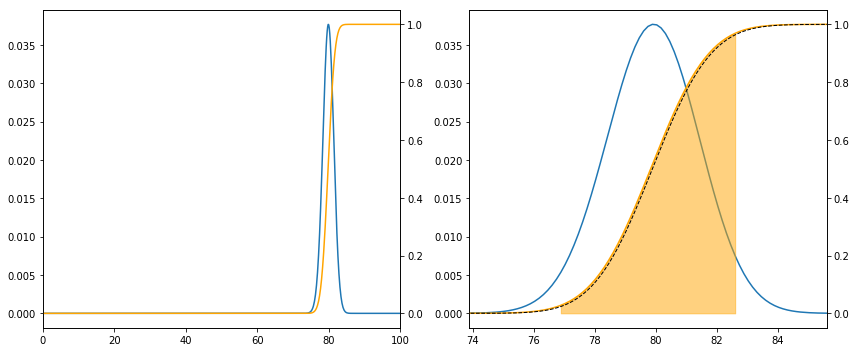

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))

ax = axes[0]
ax.plot(xx,y)
ax.set(xlim=[0,100])
ax = ax.twinx()
ax.plot(xx,z, color="orange")

ax = axes[1]
ax.plot(xx,y)
ax = ax.twinx()
ax.plot(xx,z, color="orange")
ax.plot(xx,na, color="black", linestyle="--", linewidth=1)
start = np.nonzero(z>0.025)[0][0]
end = np.nonzero(z>=1-0.025)[0][0]
#ax.plot([start,start], [0, z[start]], color="orange")
#ax.plot([end,end], [0, z[end]], color="orange")
ax.fill_between(xx[start:end], z[start:end], color="orange", alpha=0.5)
g = (end - start)/2
s = int(max(0, start-g))
e = int(min(sample_size, end+g))
ax.set(xlim=[xx[s], xx[e]])

fig.tight_layout()
None

In [10]:
fig.savefig("ss_two.png")

# Standard error

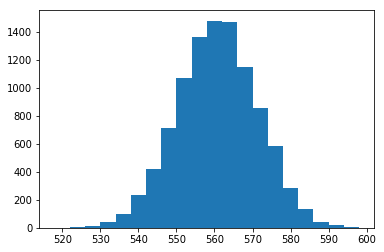

In [15]:
samples = np.random.binomial(sample_size, p, 10000)
plt.hist(samples, bins=20)
None

In [18]:
np.mean(samples), sample_size * p

(560.2416, 560.0)

In [19]:
np.std(samples), np.sqrt(sample_size * p * (1-p))

(10.61853235809921, 10.583005244258361)

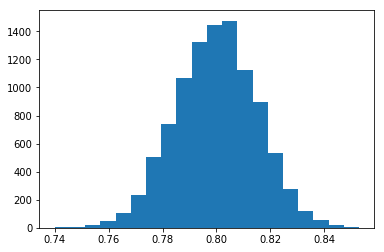

In [20]:
samples = np.random.binomial(sample_size, p, 10000) / sample_size
plt.hist(samples, bins=20)
None

In [21]:
np.mean(samples), p, np.std(samples), np.sqrt(p*(1-p)/sample_size)

(0.7999875714285714, 0.8, 0.015242985962101269, 0.015118578920369089)

In [23]:
2 * 0.55 * np.sqrt(p*(1-p)/sample_size)

0.016630436812406